### Image classification Model creation

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Image Preprocessing

In [4]:
train_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)

In [6]:
training_images = train_image_generator.flow_from_directory(
                                        'covid19dataset/train',
                                        target_size=(64, 64),
                                        batch_size=8,
                                        class_mode='binary')

Found 130 images belonging to 2 classes.


In [7]:
testing_images = test_image_generator.flow_from_directory(
                                        'covid19dataset/test',
                                        target_size=(64, 64),
                                        batch_size=8,
                                        class_mode='binary')

Found 18 images belonging to 2 classes.


In [8]:
def plotImages(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

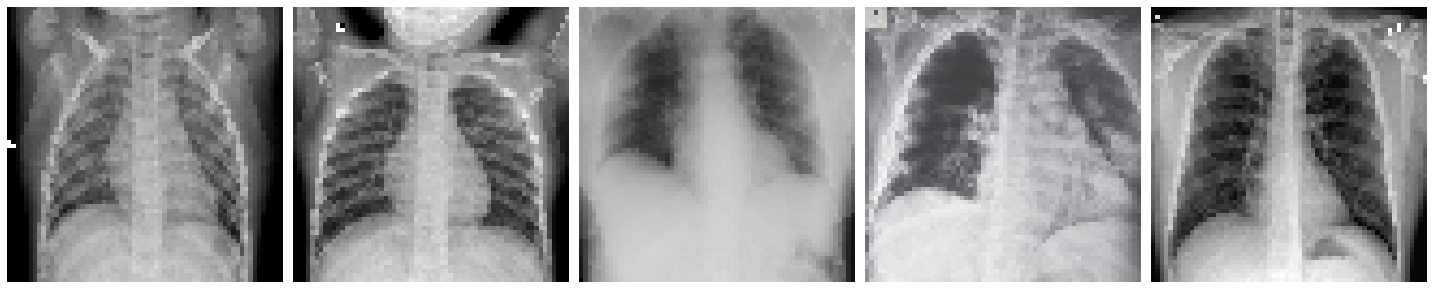

In [9]:
# sample from training images
sample_training_images, _ = next(training_images)
# Plot 5 images 
plotImages(sample_training_images[:5])

### Create CNN model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Further Adding the NeuralNet in ConvNet Model
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Train the model 

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# use fit_generator instead of fit  -> if we have used ImageDataGenerator for our Image Data Set Creation
history = model.fit_generator(training_images, epochs=5, validation_data=testing_images)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
17/17 [==============================] - 4s 257ms/step - loss: 0.7542 - accuracy: 0.5077 - val_loss: 0.6346 - val_accuracy: 0.5000
Epoch 2/5
17/17 [==============================] - 4s 220ms/step - loss: 0.4614 - accuracy: 0.7846 - val_loss: 0.3039 - val_accuracy: 1.0000
Epoch 3/5
17/17 [==============================] - 4s 236ms/step - loss: 0.1981 - accuracy: 0.9462 - val_loss: 0.1317 - val_accuracy: 1.0000
Epoch 4/5
17/17 [==============================] - 4s 242ms/step - loss: 0.0779 - accuracy: 0.9923 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 5/5
17/17 [==============================] - 4s 241ms/step - loss: 0.0631 - accuracy: 0.9846 - val_loss: 0.0242 - val_accuracy: 1.0000


### Visualizing accuracy and loss

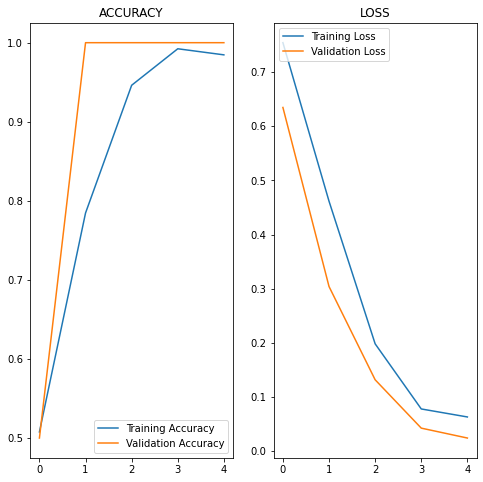

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('LOSS')

plt.show()

In [ ]:
 """ 
 After the observations on our training and testing images, 
 we might would not have found the corredt modeling for our dataset
 1. Either, we gather more images and more meaningful images and work again to train thr modedl
 2. Perform Image Augmentation 
 From the training and testing images we gonna create more set where we flip the images rotate the images etc
 """

In [14]:
# save the model 
model.save("model.h5")  # h5 format was a bit previous model for previous versions of kera
model.save("model")       # the latest approach : model is a folder in which model will be saved anc can be any name of your choice
# print(">> MODEL SAVED :)")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets
